In [19]:
# Ranger 7 mission
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# constants
G=6.67e-11 
m_earth=5.98e24 # kg (Earth's mass)
m_ranger= 10000 # kg (mass of rcocket)
m_moon=7.35e22 # kg (moon's mass)
r_earth=6.388e6 # m (radius of Earth)
r_moon_earth=3.844e8 # m (distance from Earth to moon)
r_moon=1740e3 #m
# point of no return
a=1.0-(m_moon/m_earth)
b=-2.0*r_moon_earth
c=r_moon_earth**2
r_point_of_no_return = (-b-math.sqrt(b**2-4*a*c))/(2.0*a)

# this is the differential equation that I'm solving
def dstate_dt(t, state, m_e, m_m, m_r, G, REM, r_point_of_no_return, r_earth): 
    r, v = state
    
    dr_dt = v
    #F_earth=(-G*m_earth*m_ranger)/(r**2)
    #F_moon=(G*m_moon*m_ranger)/((r_moon_earth-r)**2)
    #F_net=F_earth+F_moon
    # a = dv/dt = F_net/m 
    dv_dt = ((-G*m_e)/r**2) + (G*m_m)/((REM-r)**2)
    #note that the ranger/rocket's mass has divided out
        
    return [dr_dt, dv_dt]


# simulation parameters
t_limit = [0,3*24*3600]
r0 = r_earth+50.0e3
v0 = 11.5e3

# define events  
# useful reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
def passed_point_of_no_return(t, state, m_e, m_m, m_r, G, REM, r_point_of_no_return, r_earth): 
    r, v = state
    return r-r_point_of_no_return

def fell_back_to_earth(t, state, m_e, m_m, m_r, G, REM, r_point_of_no_return, r_earth):
    r, v = state
    return r-r_earth
fell_back_to_earth.terminal = True
# why won't this work???
# fell_back_to_earth.Terminal = True

def made_it_to_the_moon(t, state, m_e, m_m, m_r, G, REM, r_point_of_no_return, r_earth):
    r, v = state
    return REM-r
made_it_to_the_moon.terminal = True

solution = solve_ivp(
    dstate_dt, # derivative as function
    t_limit,  # time interval to solve for
    [r0, v0], # initial values
    args=(m_earth,m_moon,m_ranger,G,r_moon_earth,r_point_of_no_return, r_earth,),
    method="RK45",
    events=(fell_back_to_earth, passed_point_of_no_return, made_it_to_the_moon),
    dense_output=True
)

print(solution,"\n")
print("first few simulation values: ")
print("time = ",solution.t[0:4])
print("radius from earth = ",solution.y[0,0:4])
print("velocity = ",solution.y[1,0:4])
print("\nEvents tracked were:     events=(fell_back_to_earth, passed_point_of_no_return, made_it_to_the_moon),")
print("t_events = ",solution.t_events)
print("y_events = ",solution.y_events)

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.725e-01 ...  7.973e+04  1.000e+05]
        y: [[ 6.438e+06  6.442e+06 ...  3.171e+08  3.844e+08]
            [ 1.150e+04  1.150e+04 ...  3.314e+03  3.336e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002025B0C6930>
 t_events: [array([], dtype=float64), array([ 8.848e+04]), array([ 1.000e+05])]
 y_events: [array([], dtype=float64), array([[ 3.460e+08,  3.299e+03]]), array([[ 3.844e+08,  3.336e+03]])]
     nfev: 80
     njev: 0
      nlu: 0 

first few simulation values: 
time =  [ 0.          0.37247474  4.09722219 41.34469663]
radius from earth =  [6438000.         6442282.79230099 6485037.6726109  6905619.84400278]
velocity =  [11500.         11496.41795096 11460.85739715 11129.21239587]

Events tracked were:     events=(fell_back_to_earth, passed_point_of_no_return, made_it_to_the_moon),
t_events =  [array([], dtype=float64), array([88476.63706873]), array([10004

In [143]:
# How do you get at the event time arrays for plotting???
print(solution.y_events)
print(solution.y_events[1])
print(solution.y_events[1][0])
print(solution.y_events[1][0][0])

[array([], dtype=float64), array([[3.46036757e+08, 3.29922749e+03]]), array([[3.84400000e+08, 3.33634245e+03]])]
[[3.46036757e+08 3.29922749e+03]]
[3.46036757e+08 3.29922749e+03]
346036757.15451413


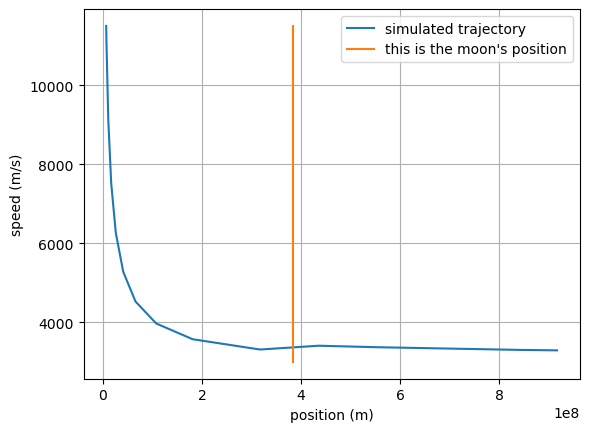

In [17]:
plt.plot(solution.y[0], solution.y[1],label="simulated trajectory")
plt.plot([r_moon_earth,r_moon_earth],[3e3,v0],label="this is the moon's position")
#plt.plot(solution.t_events[1],solution.y_events[1][0][0],'ro',label="point of no return")
plt.legend()
plt.xlabel('position (m)')
plt.ylabel('speed (m/s)')
plt.grid()
#plt.savefig("t-F_plot.png")
#plt.close()